# 4.10 Coding Etiquette and Excel Reporting

Contents:
* Import Libraires and Data
* Security Implications
* Customer Behavior across Geographic Regions
* Create exclusion flag for low-activity customers (<5 orders)
* Customer Profiling
       >- Age Profile
       >- Dependants Profile
       >- Income Profile
       >- Departments Profile
       >- Behavioral Markets
            >-Alcohol vs non alcohol users
            >-Pet owners
            >-Vegetarians
            >-With Babies
            >-Early bird VS Night Owl
           
* Visualizaions of Customer Profiles
        >-Pie chart of drinkin habits
        >-Pie chart of pet owners
        >-Bar chart of Order time habits
        >-Bar chart of Incomes Across US regions
        >-Bar chart of family status
* Aggregated Customer Profiles
* Customer Profiles in Regions and Departments
        >-Stacked Bar chart of Purchase Days by Age category
        >-Stacked bar chart of Vegetarians & Non-vegatarians Across US Regions
        >-Stacked Bar chart of Order time habits Across US regions
        >-Stacked bar chart of family status
* Export Data and Visualizations
   
   

## 1. Import Libraries and Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
# import orders_products_merged.pkl
ords_prods_all = pd.read_pickle(r'C:\Users\kaydo\OneDrive\Desktop\Python\Data\Prepared Data\Instacart_data.pkl')

In [133]:
#create path
path = r'C:\Users\kaydo\OneDrive\Desktop\Python'

In [135]:
# import departments.csv
dept_df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'),index_col = False)

## 2. Security Implications

First name and Last name columns within the customer dataset were previously removed in task 4.9 to remain in compliance with customer privacy

In [7]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'Order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_prices', 'spending_flag', 'median_freq', 'order_freq_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income'],
      dtype='object')

## 3. Comparing Customer Behavior across Geographic Regions

In [8]:
#Checking State column
ords_prods_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
#Define regoinal lists
region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
#Create new column Region based on region list
ords_prods_all.loc[ords_prods_all['state'].isin(region_1_NE), 'region'] = 'Northeast'
ords_prods_all.loc[ords_prods_all['state'].isin(region_2_MW), 'region'] = 'Midwest'
ords_prods_all.loc[ords_prods_all['state'].isin(region_3_S), 'region'] = 'South'
ords_prods_all.loc[ords_prods_all['state'].isin(region_4_W), 'region'] = 'West'

In [11]:
#Check region values
ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [12]:
#check dimensions 
ords_prods_all.shape

(32404859, 33)

In [14]:
#Crosstab spending habits across regions
crosstab_spending_habits = pd.crosstab (ords_prods_all['spending_flag'], ords_prods_all['region'], dropna = False)

In [16]:
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,29265,18642,40564,31223
Low Spender,7568060,5704094,10751321,8261690


## 4. Create exclusion flag for low-activity customers (<5 orders)

In [20]:
# Creating activity_flag based on the number of orders

ords_prods_all.loc[ords_prods_all['max_order'] <5, 'activity_flag'] = 'Low activity'
ords_prods_all.loc[ords_prods_all['max_order'] >=5, 'activity_flag'] = 'High activity'
ords_prods_all.tail(10)

,order_id,user_id,eval_set,order_number,Order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_freq_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag
32404849,1539810,106143,prior,21,1,18,5.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404850,3308056,106143,prior,22,4,20,10.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,prior,23,2,22,5.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,prior,24,6,12,4.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,prior,25,6,16,7.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404858,2922475,66343,prior,4,1,12,30.0,47210,1,1,...,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity


In [21]:
# Check frequency of new activity_flag column
ords_prods_all['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [22]:
ords_prods_all.dtypes

order_id                     int64
user_id                     object
eval_set                    object
order_number                 int64
Order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
Busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_prices                 float64
spending_flag               object
median_freq                float64
order_freq_flag             object
gender                      object
state                       object
age                          int64
date_joined         

In [26]:
#create a subset which EXCLUDES low_activity customers
high_activity_cust =ords_prods_all[ords_prods_all['activity_flag'] == 'High activity']

In [28]:
high_activity_cust.tail()

,order_id,user_id,eval_set,order_number,Order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_freq_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag
32404850,3308056,106143,prior,22,4,20,10.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,prior,23,2,22,5.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,prior,24,6,12,4.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,prior,25,6,16,7.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity


#export this subset to .pkl format will be done in exporting section


## 5. Customer Profiling

In [30]:
#Create a profile only based on high activity customers per CFO
cstmrs = high_activity_cust

### Customers based on Age

In [31]:
# explore age column
cstmrs['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

From our descriptive statistics we now understand our youngest customer is 18 whiile our oldest customer is 81. We will break this into three age groups
Youth (18- 39) 
Middle age (40 - 64)
Senior (65+)

In [33]:
#Create a flag for age categories
cstmrs.loc[(cstmrs['age'] >= 18) & (cstmrs['age'] < 40), 'age_category'] = 'Youth'
cstmrs.loc[(cstmrs['age'] >= 40) & (cstmrs['age'] < 65), 'age_category'] = 'Middle age'
cstmrs.loc[cstmrs['age'] >= 65, 'age_category'] = 'Senior'

In [34]:
cstmrs['age_category'].value_counts()

Middle age    12103910
Youth         10665110
Senior         8195544
Name: age_category, dtype: int64

In [37]:
cstmrs.head(5)

,order_id,user_id,eval_set,order_number,Order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag,age_category
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Youth
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Youth
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Youth
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Youth
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Youth


### Customers based on dependants

In [38]:
#explore number_dependants
cstmrs['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

The number of dependants ranges from a minimum of 0 to 3 being the maximum. We will group these into the following family sizes. Small (0), Mid size (1-2), Large (3)

In [40]:
#Create family size flag& column
cstmrs.loc[cstmrs['number_dependants'] == 0, 'family_size'] = 'Small'
cstmrs.loc[(cstmrs['number_dependants'] == 1) | (cstmrs['number_dependants'] == 2), 'family_size'] = 'Mid size'
cstmrs.loc[cstmrs['number_dependants'] > 2, 'family_size'] = 'Large'

In [42]:
cstmrs['family_size'].value_counts(dropna = False)

Mid size    15452367
Large        7772516
Small        7739681
Name: family_size, dtype: int64

In [44]:
#explore number_dependants and marital_status
family_crosstab = pd.crosstab(cstmrs['family_status'],cstmrs['number_dependants'],dropna = False)

In [45]:
family_crosstab

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [48]:
#create flag based on family status and number of dependants
cstmrs.loc[(cstmrs['family_status'] == 'married') & (cstmrs['number_dependants'] == 1), 'household'] = 'Couple without children'
cstmrs.loc[(cstmrs['family_status'] == 'married') & (cstmrs['number_dependants'] >= 2), 'household'] = 'Couple with children'
cstmrs.loc[(cstmrs['family_status'] == 'divorced/widowed') | (cstmrs['family_status'] == 'single'), 'household'] = 'One person'
cstmrs.loc[(cstmrs['family_status'] == 'divorced/widowed') & (cstmrs['number_dependants'] > 0 ), 'household'] = 'Single parent'
cstmrs.loc[cstmrs['family_status'] == 'living with parents and siblings', 'household'] = 'Other family'

In [49]:
# Checking new column household

cstmrs['household'].value_counts(dropna = False)

Couple with children       14532650
One person                  7739681
Couple without children     7211061
Other family                1481172
Name: household, dtype: int64

In [50]:
#confirming new column
cstmrs.shape

(30964564, 37)

### Customers based on Income

In [51]:
#explore income column
cstmrs['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

From these descriptive statistics we can now understand that 25k USD is the lowest income where 593k USD is the highest income. From this we will create a flag based on the following groups.

Low income (<70k)
Middle (70- 100k)
Upper (100 - 130k)
High (>130)

In [53]:
#create income category with flag
cstmrs.loc[cstmrs['income']< 70000, 'income_category'] = 'Low'
cstmrs.loc[(cstmrs['income']>= 70000) & (cstmrs['income']< 100000), 'income_category'] = 'Middle'
cstmrs.loc[(cstmrs['income']>= 100000) & (cstmrs['income']< 130000), 'income_category'] = 'Upper mid'
cstmrs.loc[cstmrs['income']>= 130000, 'income_category'] = 'High'

In [54]:
#check frequency on income categories
cstmrs['income_category'].value_counts(dropna = False)

Low          8520533
Middle       8236629
High         7401414
Upper mid    6805988
Name: income_category, dtype: int64

In [55]:
#confirming new column
cstmrs.shape

(30964564, 38)

### Customers based by departments

In [56]:
#review department df
dept_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [57]:
#rename unnamed column to Department Id for more clarity
dept_df.rename(columns = {"Unnamed: 0": "department_id"}, inplace= True)

In [66]:
dept_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [58]:
#create a department dictionary
dprt_map=dict(zip(dept_df["department_id"], dept_df["department"]))

In [59]:
dprt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [149]:
#Mapping customers to departments
cstmrs['department'] = cstmrs['department_id'].map(dprt_map)

C:\Users\kaydo\AppData\Local\Temp\ipykernel_25480\4222327757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs['department'] = cstmrs['department_id'].map(dprt_map)


In [73]:
cstmrs.shape

(30964564, 39)

In [74]:
#Departments values based on cstmrs 
cstmrs['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Customers based on behavioral Market

### Non-alcohal drinker customers

In [77]:
#Create alcohol_drinker column
cstmrs.loc[cstmrs['department'] !='alcohol', 'alcohol_drinker'] = 'No'
cstmrs.loc[cstmrs['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [78]:
cstmrs['alcohol_drinker'].value_counts(dropna = False)

No     30819937
Yes      144627
Name: alcohol_drinker, dtype: int64

In [79]:
#confirm new column
cstmrs.shape

(30964564, 40)

### Pet owner customers

In [81]:
#create pet_owner column
cstmrs.loc[cstmrs['department']== 'pets', 'pet_owner'] = 'Yes'
cstmrs.loc[cstmrs['department'] != 'pets', 'pet_owner'] = 'No'

In [82]:
cstmrs.shape

(30964564, 41)

In [83]:
cstmrs['pet_owner'].value_counts(dropna = False)

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

### Vegetarian Customers

In [84]:
#create a list assigned to 'vegetarian' column. 
result = []
for value in cstmrs['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')
result

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',


In [150]:
#assign 'result' list to vegetarian column
cstmrs['vegetarian'] = result

C:\Users\kaydo\AppData\Local\Temp\ipykernel_25480\32790983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs['vegetarian'] = result


In [87]:
#confirm new vegetarian column
cstmrs.shape

(30964564, 42)

In [88]:
#check frequency of vegetarian values
cstmrs['vegetarian'].value_counts(dropna = False)

Yes    29285949
No      1678615
Name: vegetarian, dtype: int64

### Customers with babies

In [89]:
#create 'with_baby' column
cstmrs.loc[cstmrs['department'] !='babies', 'parents_with_baby'] = 'No'
cstmrs.loc[cstmrs['department'] =='babies', 'parents_with_baby'] = 'Yes'

C:\Users\kaydo\AppData\Local\Temp\ipykernel_25480\1922154508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstmrs.loc[cstmrs['department'] !='babies', 'parents_with_baby'] = 'No'


In [90]:
cstmrs.shape

(30964564, 43)

In [91]:
#check frequency of with baby values
cstmrs['parents_with_baby'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: parents_with_baby, dtype: int64

### Early bird VS Night owl customers

In [93]:
cstmrs['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [95]:
#Create 'period_of_day' column based on order time
cstmrs.loc[cstmrs['order_hour_of_day'] <5 , 'order_time_habit'] = 'Night owl'
cstmrs.loc[(cstmrs['order_hour_of_day']>= 9) & (cstmrs['order_hour_of_day']<= 23), 'order_time_habit'] = 'Regular'
cstmrs.loc[(cstmrs['order_hour_of_day']>= 5) & (cstmrs['order_hour_of_day']< 9), 'order_time_habit'] = 'Early bird'


In [96]:
cstmrs['order_time_habit'].value_counts(dropna = False)

Regular       27593897
Early bird     2887754
Night owl       482913
Name: order_time_habit, dtype: int64

## 6. Visualizations of Customer Profiles

Text(0.5, 1.0, 'Instacart Customers Drinking Habits')

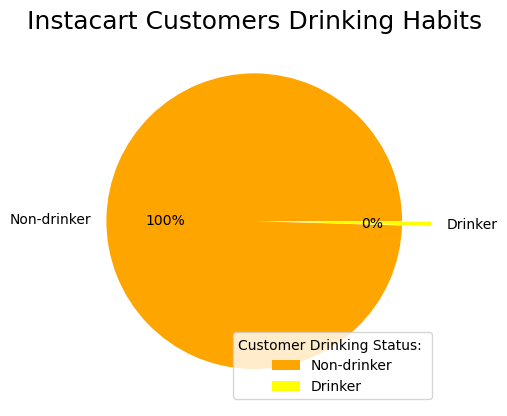

In [98]:
#Pie chart for alochol drinking profile
alcohol_drinker_pie = cstmrs['alcohol_drinker'].value_counts().plot.pie(labels = ['Non-drinker','Drinker'], autopct=('%1.f%%'), colors = ['orange', 'yellow'], label = '', explode = [0,0.2])
alcohol_drinker_pie.legend(title = 'Customer Drinking Status: ', loc = 'lower right')
plt.title("Instacart Customers Drinking Habits", fontsize = '18')

Text(0.5, 1.0, 'Instacart Pet Owners')

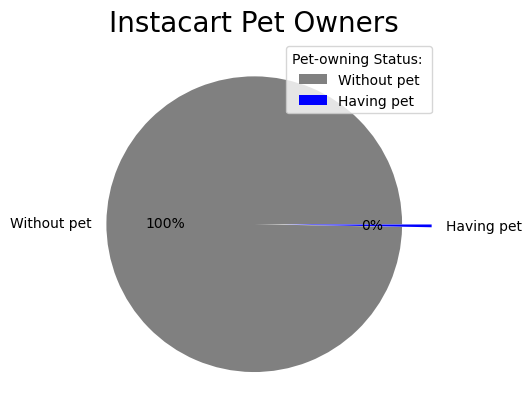

In [99]:
# Pie chart for Pet Owners
pet_owner_pie = cstmrs['pet_owner'].value_counts().plot.pie(labels = ['Without pet','Having pet'], autopct=('%1.f%%'), colors = ['grey','blue'], label = '', explode = [0,0.2])
pet_owner_pie.legend(title = 'Pet-owning Status: ', loc = 'upper right')
plt.title( "Instacart Pet Owners", fontsize= '20')

Text(0.5, 0, 'Order Habits')

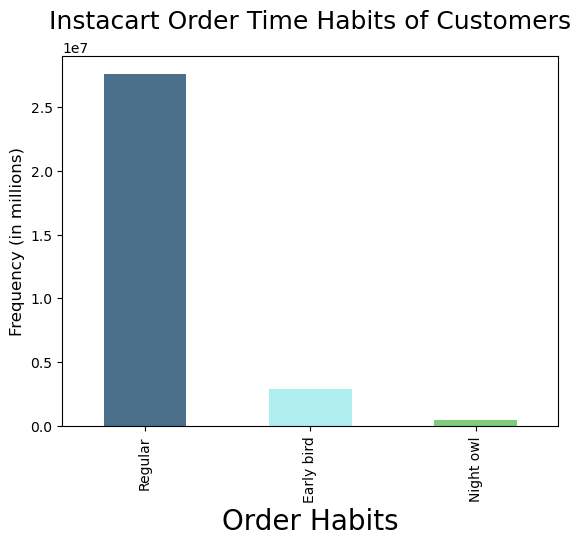

In [100]:
#Bar chart for Order Times
time_habit_bar = cstmrs['order_time_habit'].value_counts().plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C'])
plt.title('Instacart Order Time Habits of Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order Habits',  fontsize = 20)

In [101]:
# Stacked bar chart of income_category across regions
crosstab_income_region = pd.crosstab (cstmrs['region'],cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle,Upper mid
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


Text(0.5, 0, 'Region')

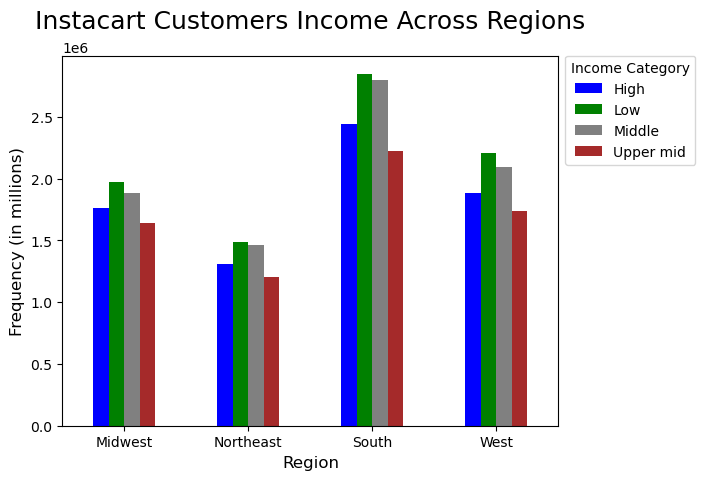

In [103]:
#Stacked bar chart of income categories across regions
bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'grey', 'brown'])
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Instacart Customers Income Across Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple with children'),
  Text(1, 0, 'One person'),
  Text(2, 0, 'Couple without children'),
  Text(3, 0, 'Other family')])

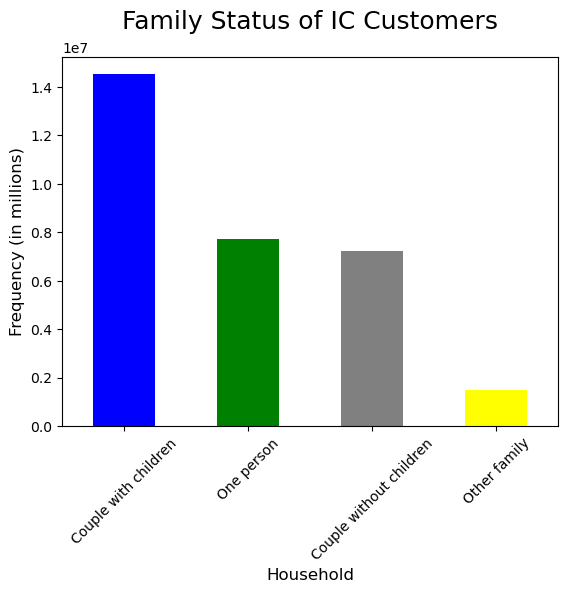

In [104]:
#create bar chart of Instacart's family status
bar_household = cstmrs['household'].value_counts().plot.bar(color= ['blue', 'green', 'grey', 'yellow'])
plt.title('Family Status of IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

## 7. Aggregate customer profiles for frequency and expenditure usage

In [106]:
# Department category aggregation
cstmrs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.330997  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733725  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

In [107]:
# Age category aggregation
cstmrs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
age_category                           
Middle age            8.354216   1  145
Senior                8.307779   1   99
Youth                 8.415515   1  109

In [108]:
#Region category aggregation
cstmrs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.791512  1.0  25.0
Northeast  7.780673  1.0  25.0
South      7.793589  1.0  25.0
West       7.789507  1.0  25.0

In [109]:
#Region usage aggregation
cstmrs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                       mean min  max
region                              
Midwest            8.353883   1  109
Northeast          8.376380   1  145
South              8.365296   1  137
West               8.359292   1  114

In [110]:
#Family status aggregation
cstmrs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                                     mean min  max
household                                         
Couple with children             8.370658   1  145
Couple without children          8.373970   1  114
One person                       8.336567   1  137
Other family                     8.373383   1  102

In [111]:
#Income aggregation
cstmrs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
High             7.946828  1.0  25.0
Low              7.358221  1.0  25.0
Middle           7.956898  1.0  25.0
Upper mid        7.957010  1.0  25.0

In [112]:
#income frequency aggregation
cstmrs.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
income_category                           
High                     8.480898   1  121
Low                      7.965765   1  137
Middle                   8.528310   1  114
Upper mid                8.532210   1  145

In [113]:
#order time habit aggregation
cstmrs.groupby('order_time_habit').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
order_time_habit                           
Early bird                8.541485   1   93
Night owl                 8.614131   1  109
Regular                   8.339969   1  145

In [114]:
#customers with babies aggregation
cstmrs.groupby('parents_with_baby').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                               mean min  max
parents_with_baby                           
No                         8.333289   1  145
Yes                       10.577894   1   92

In [115]:
#customers with babies expenditure aggregation
cstmrs.groupby('parents_with_baby').agg({'prices' : ['mean', 'min', 'max']})

prices           
                       mean  min   max
parents_with_baby                     
No                 7.791864  1.0  25.0
Yes                7.634399  1.0  15.0

In [116]:
#vegetarian frequency aggregation
cstmrs.groupby('vegetarian').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                        mean min  max
vegetarian                           
No                  8.643732   1  142
Yes                 8.346950   1  145

In [117]:
#vegetarian expenditure aggregation
cstmrs.groupby('vegetarian').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
vegetarian                      
No          11.206942  1.0  25.0
Yes          7.593912  1.0  20.0

## 8. Customer Profiles in Regions & Departments

In [121]:
# Investigating the connection of age categories and the day of orders
crosstab_age_day = pd.crosstab(cstmrs['age_category'], cstmrs['Order_day_of_week'], dropna = False)

Text(0.5, 0, 'Age Category')

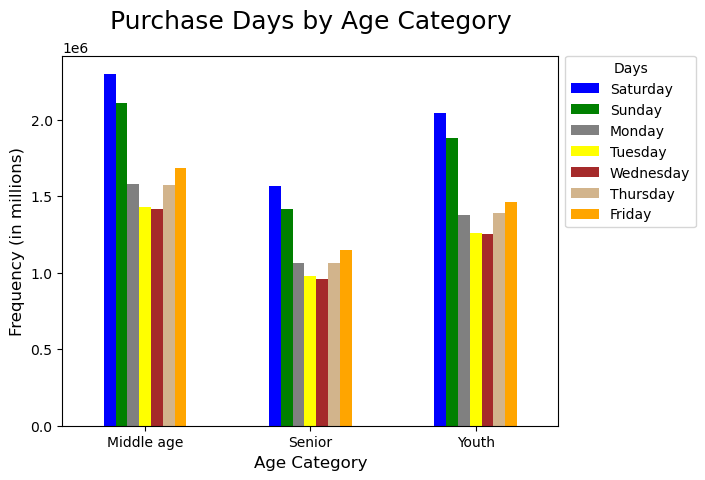

In [122]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'grey', 'yellow', 'brown','tan', 'orange'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchase Days by Age Category', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

In [123]:
#Crosstab of vegetarians aross regions
crosstab_vegetarian = pd.crosstab(cstmrs['region'], cstmrs['vegetarian'], dropna = False)
crosstab_vegetarian

vegetarian,No,Yes
region,,
Midwest,392724,6868789
Northeast,296969,5167716
South,557740,9753399
West,431182,7496045


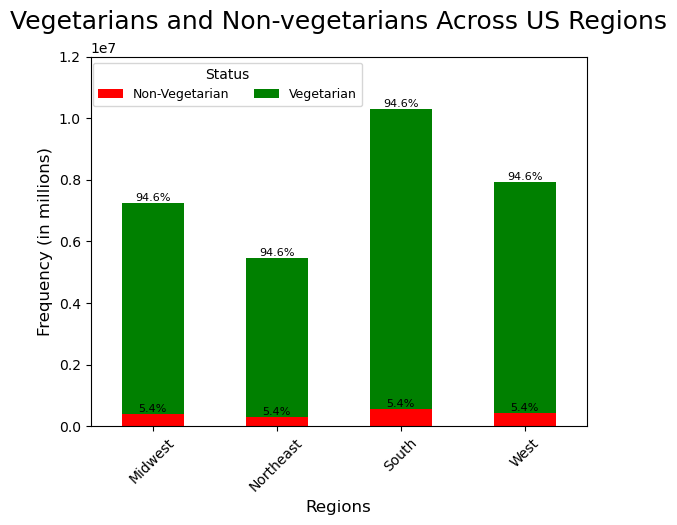

In [125]:
# Stacked bar chart for Vegetarians across the regions

bar_region_veg = crosstab_vegetarian.plot(kind = 'bar', stacked = True, color =['red', 'green'])
bar_region_veg.legend(title='Status', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Vegetarian', 'Vegetarian'], fontsize = 9)
plt.title('Vegetarians and Non-vegetarians Across US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the stacked bar chart

# Get the total for each row
total = crosstab_vegetarian.sum(axis=1)

# Calculate the percent for each row
per = crosstab_vegetarian.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_region_veg.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c, per[(label)])]
    
    # Add the annotation
    bar_region_veg.bar_label(c, labels=labels, label_type='edge', fontsize = 8)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 12000000)


In [126]:
#Crosstab on order time habits and region
ct_habit = pd.crosstab(cstmrs['region'], cstmrs['order_time_habit'], dropna = False)
ct_habit

order_time_habit,Early bird,Night owl,Regular
region,,,
Midwest,670594,113520,6477399
Northeast,511923,86857,4865905
South,973296,159939,9177904
West,731941,122597,7072689


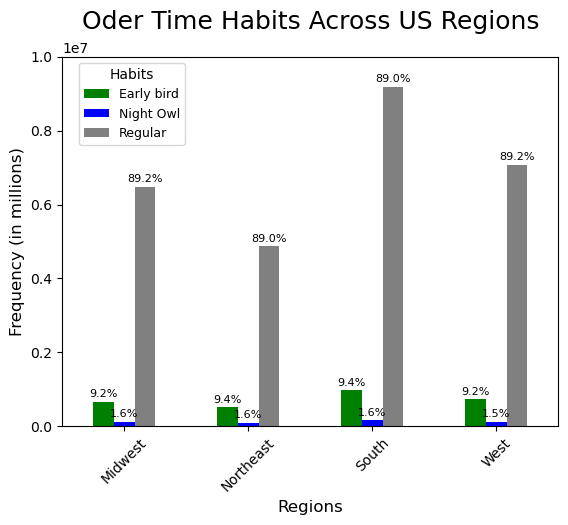

In [127]:
#plot stacked bar graph of order time habits and region
bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['green', 'blue','grey'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits Across US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

# Get the total for each row
total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)


In [128]:
#Crosstab on region and parents with baby
ct_bybs = pd.crosstab(cstmrs['region'], cstmrs['parents_with_baby'], dropna = False)

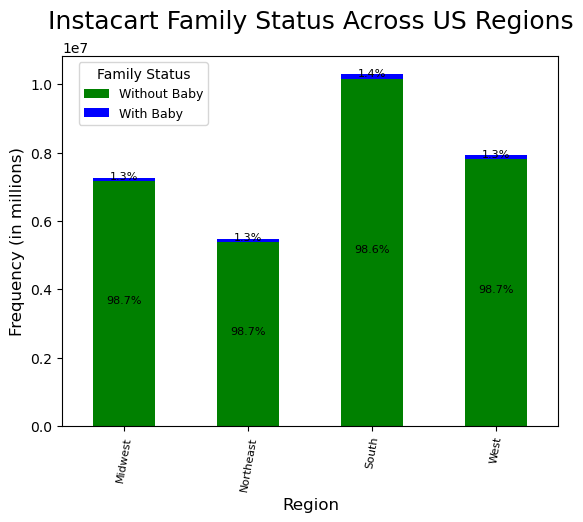

In [130]:
#Stacked bar on region and parents with baby
bar_bybs = ct_bybs.plot(kind = 'bar', stacked = True, color= ['green', 'blue'])
bar_bybs.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Without Baby', 'With Baby'], fontsize = 9)
plt.title('Instacart Family Status Across US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_bybs.sum(axis=1)

# Calculate the percent for each row
per = ct_bybs.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_bybs.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_bybs.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


## 9. Exporting


### Export Dataframes

In [137]:
#export high activity to .pkl format
high_activity_cust.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_cust_orders.pkl'))

In [138]:
#export cstmrs to pkl format
cstmrs.to_pickle(os.path.join(path,'Data', 'Prepared Data','cstmrs_profiling.pkl'))

### Export Charts

In [140]:
# Exporting alcohol_drinker distribution pie chart in .png format

alcohol_drinker_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'alcohol_drinker_pie.png'), bbox_inches='tight')

In [141]:
# Exporting pet_owner distribution pie chart in .png format

pet_owner_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pet_owner_pie.png'), bbox_inches='tight')

In [142]:
# Exporting order_time_habit distribution bar chart in .png format
time_habit_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'time_habit_bar.png'), bbox_inches='tight')

In [143]:
# Exporting income (in the US regions) bar chart in .png format
bar_inc_reg.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_inc_reg.png'), bbox_inches='tight')

In [144]:
# Exporting household distribution bar chart in .png format
bar_household.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_household.png'), bbox_inches='tight')

In [145]:
# Exporting age categories (between IC customers by week) bar chart in .png format
bar_age_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age_day.png'), bbox_inches='tight')

In [146]:
# Exporting vegetarians (in the US regions) bar chart in .png format
bar_region_veg.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_veg.png'), bbox_inches='tight')

In [147]:
# Exporting order_time_habits (in the US regions) bar chart in .png format
bar_hbt_rgn.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_hbt_rgn.png'), bbox_inches='tight')

In [148]:
# Exporting parents_with_babies bar chart in .png format
bar_bybs.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_bybs.png'), bbox_inches='tight')